# Fishing Messages Per Month

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
df = pd.read_csv('../artikis_python/fishingmonth.csv', header=None,sep=';')

In [54]:
df.head

<bound method DataFrame.head of         0   1
0  266961   2
1  190729   3
2  169513  11
3  151189  10
4  119942  12
5  115142   1
6     120   9>

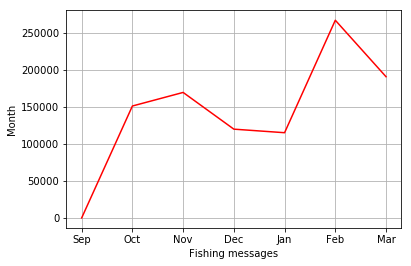

In [55]:
x1=[df[0][6], df[0][3], df[0][2],df[0][4],df[0][5], df[0][0], df[0][1]]
x=[int(i)for i in x1 ]

LABELS = ["Sep", "Oct", "Nov","Dec","Jan","Feb","Mar"]

plt.plot([1,2,3,4,5,6,7], x,color='red')
plt.xlabel('Fishing messages')
plt.ylabel('Month')
plt.xticks([1,2,3,4,5,6,7], LABELS)
plt.grid()
plt.show()


In [56]:
df = pd.read_csv('../artikis_python/vesselcount.csv', header=None,sep=';')

NameError: name 'data' is not defined

In [71]:
df = pd.read_csv('../artikis_python/vesselcount.csv',sep=';',header=None)

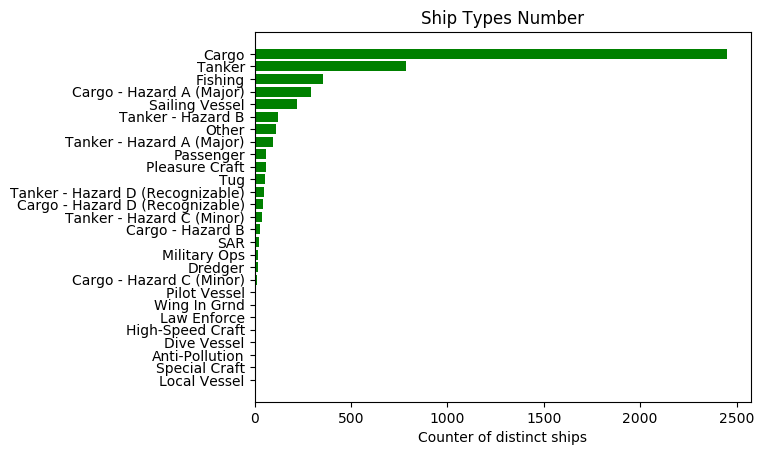

In [104]:

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
ship = df[0]
y_pos = np.arange(len(ship))
count = df[1]

ax.barh(y_pos, count, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(ship)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Counter of distinct ships')
ax.set_title('Ship Types Number')
plt.show()

In [7]:
df = pd.read_csv('../artikis_python/fishingmonth.csv', header=None,sep=';')

Top 10 most useful features for predicting the class:
1 - Elevation
2 - Horizontal_Distance_To_Roadways
3 - Horizontal_Distance_To_Fire_Points
4 - Hillshade_Noon
5 - Vertical_Distance_To_Hydrology
6 - Aspect
7 - Horizontal_Distance_To_Hydrology
8 - Hillshade_9am
9 - Hillshade_3pm
10 - Slope


In [8]:
df = pd.read_csv('../artikis_python/fishingmonth.csv', header=None,sep=';')

In [22]:
import itertools
import time
label=['1st ','2nd ']
lbls=[]
dataset={}
#Discretization of the continuous values of the attributes into binary.Split the dataset into two equals partitions
#values that are smaller or bigger from the median value.
for ind,attr in enumerate(top10):
    dataset[attr]=pd.qcut(np.array(x.loc[:,x.columns==attr]).ravel(), len(label),labels=[label[0]+' '+attr,label[1]+' '+attr])
    lbls.append(label[0]+' '+attr)
    lbls.append(label[1]+' '+attr)

y=np.array(y).ravel()
confidence={}
support={}
klo=0
length=len(y)
class_vec={}
w=[1,2,3,4,5,6,7]
start = time.time()
all_rules=[]
for class_c in range(1,8):
    class_vec[class_c]=np.array(y==str(class_c))
for outer in range(1,5):
    entered=0
    for perm in itertools.combinations(lbls, outer):
        my_ind=0
        #TotalRule:The string containing the rule in form of R1^R2^R3...^Rk->class
        totalRule=''
        #The vector that will contain the result of the R1^R2^R3...Rk.
        temp=''
        #Due to permutation function, a lot of the combinations between the rules are irrelevant( for example combination of R1 and the opposit
        #rule of R1)
        dbl_rule=0
        #Variable to check whether the support number falls lower than 
        threshold=0
        klo+=1
        if klo%1000==0:print 'Algorithm performed ',klo,' iterations.Current rule length is ',outer,'.'
        for ind,rule in enumerate(perm):
            #Split the string and get the name of the attribute. If that presents inside the rule more than one time('1st Elevation,'2nd elevation)
            #skip this rule as there are no items that can satisfy them.
             if len([k for k in perm if str(k.split(' ')[2])==((rule.split(' ')[2]))])>1:
                    dbl_rule=1
                    break
        if dbl_rule==0:
            #Base on the hypothesis that a frequent itemset contains frequent sub-itemsets, in case we encounter a rule that is of a form 
            # A^B^C  and we have already added the rule A^B, we do not perform any iteration on the first one because it will produce
            if outer>1:
                w=find_pred(perm,all_rules,[index_ for index_ in range(1,8)])
            #print w
            if len(w)!=0:
                for ind,rule in enumerate(perm):
                    totalRule=totalRule+'^'+rule
                    #Calculate the total number of elements in the 1000 subset that satisfy the condition:
                    #dataset[Feature Name]==Rule Value
                    #eg dataset['Elevation']=='1st Elevation'
                    #Returns a vector with true in the indices that satisfy,false otherwise.Afterwards,for each rule it performs the logical 'AND'
                    #operation,producing the final result of the indices that satisfy the whole rule.
                    if ind ==0:
                        temp=dataset[str(rule).split(' ')[2]]==str(rule)
                    else:
                        temp=temp&(dataset[str(rule).split(' ')[2]]==str(rule))
                    supp=sum(temp)/float(length)
                    #Calculate support for each step.Because the rules are contain logical and between them,any rule we got will reduce the support
                    #(if you add more restrictions,you get a smaller subset of instances).Thus ,if support fells behind a a number,there is no need
                    #to continue calculating the rule.
                    if supp<0.1:
                        threshold=1
                        break
                if threshold==1:
                    continue
                else:
                    for class_c in w:
                        #Get all instances of dataset that their class is equal to the number presented each time.
                        class_=class_vec[class_c]
                        #Calculate the R1^R2^R3....RK->CLASS
                        m_sum=sum(temp&class_)
                        denominator=sum(temp)
                        #Confidence=NUM(RULES->CLASS)/NUM(RULES)
                        #Support=NUM(RULES->CLASS)/NUM(DATASET)
                        conf=m_sum/float(denominator)
                        supp=m_sum/float(length)
                        if conf>=0.5 and supp>=0.1:
                            #Assign the confidence and support to a dictionary with key RULES->CLASS
                            confidence[totalRule[1:]+'->'+str(class_c)]=conf
                            support[totalRule[1:]+'->'+str(class_c)]=supp
                            #If we reach a state where no more knowledge can be extracted,leave the iteration.If we find no rules of length 5 
                            #there definitely no reason to continue searching for bigger rules
                            entered=outer
                            lst=totalRule[1:].split('^')
                            lst.append(class_c)
                            all_rules.append(lst)
                        
                    
    if entered==0:
        print "No new rules added,leaving...",outer
        break
print 'Time for processing rules:minutes:%1.f seconds:%4.f'%((time.time()-start)/float(60),(time.time()-start))



Algorithm performed  1000  iterations.Current rule length is  3 .
Algorithm performed  2000  iterations.Current rule length is  4 .
Algorithm performed  3000  iterations.Current rule length is  4 .
Algorithm performed  4000  iterations.Current rule length is  4 .
Algorithm performed  5000  iterations.Current rule length is  4 .
Algorithm performed  6000  iterations.Current rule length is  4 .
Time for processing rules:minutes:1 seconds:  58


In [31]:
d=0
for key, value in sorted(confidence.iteritems(), key=lambda (k,v): (v,k),reverse=True):
    if d<3:
        print 'Result ',d+1
        print '------------------------------------------------------------------------'
        print "Rule:%s"%(key)  
        print "Confidence:%s"%(value)
        print "Support%s"%(support[key])
        print 
    else:
        break
    d+=1

Result  1
------------------------------------------------------------------------
Rule:1st  Elevation^2nd  Horizontal_Distance_To_Fire_Points->2
Confidence:0.724444444444
Support0.163

Result  2
------------------------------------------------------------------------
Rule:1st  Elevation^2nd  Horizontal_Distance_To_Roadways->2
Confidence:0.711229946524
Support0.133

Result  3
------------------------------------------------------------------------
Rule:2nd  Horizontal_Distance_To_Roadways^2nd  Horizontal_Distance_To_Fire_Points^2nd  Hillshade_Noon->2
Confidence:0.666666666667
Support0.108

